<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/MIP231030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("remotes")
install.packages("directlabels")
install.packages("gridExtra")
remotes::install_github("tskmr/statds")

In [3]:
library(tidyverse); library(statds); library(grid);
library(directlabels); library(scales)
theme_set(mytheme_bw(36)+
            theme(axis.title.x = element_text(family = "serif"),
                  axis.title.y = element_text(family = "serif")))


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘statds’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:purrr’:

    compact


The following object is masked from ‘package:tibble’:

    has_name


The following objects are masked from ‘package:ggplot2’:

    draw_key_boxplot, gg_dep, remove_missing, should_stop, waiver


The following object is masked from ‘package:stats’:

    aov



Attaching package: ‘scales’


The following obje

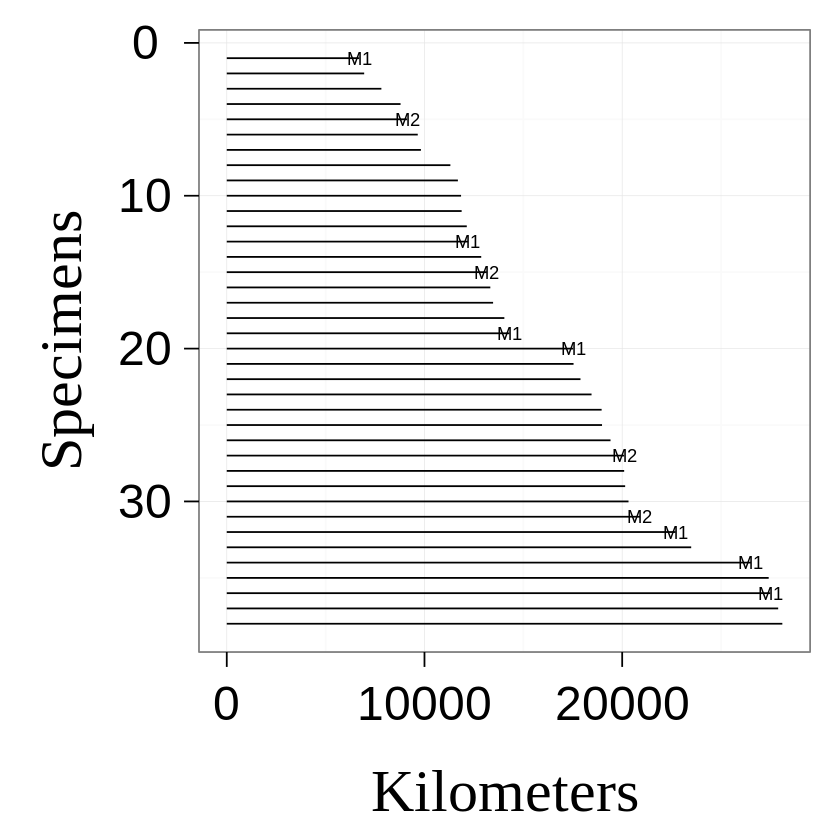

In [5]:
# source("data.R") # see p.59
distance = statds::shock.absorbers$Distance
mode = statds::shock.absorbers$Failure.Mode

data.frame(t=distance, mode) %>%
  mutate(i = seq_along(t)) %>%
  ggplot(aes(0, i))+
  geom_segment(aes(xend=t, yend=i))+
  geom_text(aes(x=t, label=mode))+
  xlab("Kilometers")+ylab("Specimens")+
  scale_y_reverse()


,t,nj
,<dbl>,<int>
1,6700,38
5,9120,34
13,12200,26
15,13150,24
19,14300,20
20,17520,19
27,20100,12
31,20900,8
32,22700,7


,t,nj,p,q,SF,CDF
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6700,38,0.02631579,0.9736842,0.9736842,0.02631579
5,9120,34,0.02941176,0.9705882,0.9450464,0.05495356
13,12200,26,0.03846154,0.9615385,0.9086985,0.09130150
15,13150,24,0.04166667,0.9583333,0.8708361,0.12916394
19,14300,20,0.05000000,0.9500000,0.8272943,0.17270574
20,17520,19,0.05263158,0.9473684,0.7837525,0.21624754
27,20100,12,0.08333333,0.9166667,0.7184398,0.28156025
31,20900,8,0.12500000,0.8750000,0.6286348,0.37136522
32,22700,7,0.14285714,0.8571429,0.5388298,0.46117019


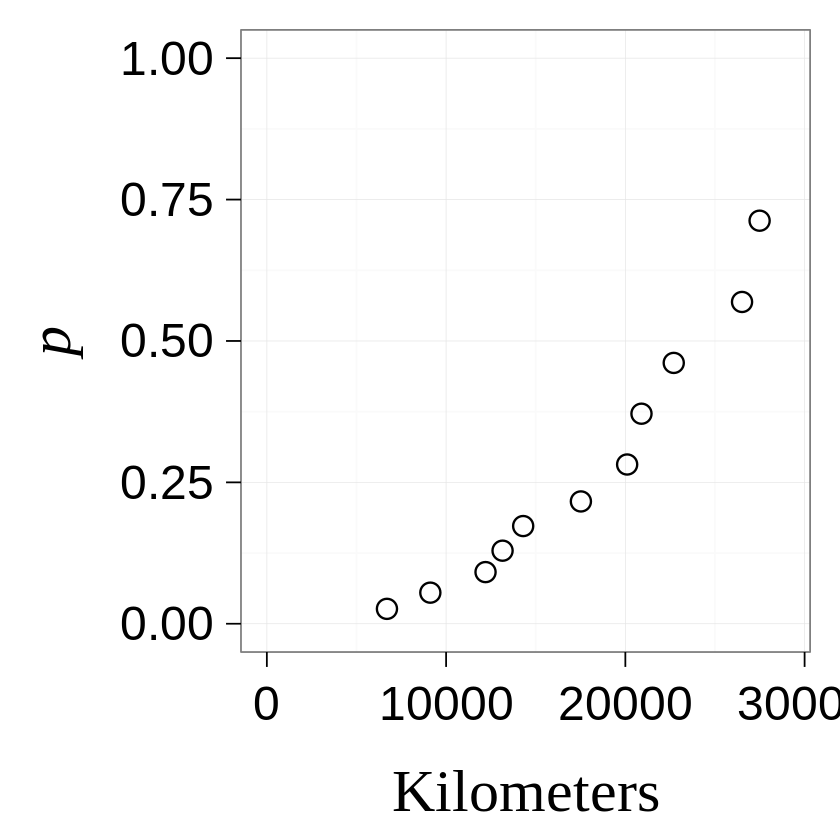

In [6]:
nj = rev(seq_along(distance))
d = data.frame(t=distance, nj)
d = d[which(mode%in%c("M1", "M2")), ]
d

d = d %>%
  mutate(p = 1/nj) %>%
  mutate(q = 1-p) %>%
  mutate(SF = cumprod(q)) %>%
  mutate(CDF = 1-SF)
d

p = d %>%
  ggplot()+
  geom_pointj(aes(t, CDF), size=5)+
  xlim(c(0, max(d$t)*1.05))+ylim(c(0,1))+
  xlab("Kilometers")+ylab(quote(italic(p)))
p


,t,nj
,<dbl>,<int>
1,6700,38
5,9120,34
13,12200,26
15,13150,24
19,14300,20
20,17520,19
27,20100,12
31,20900,8
32,22700,7


,t,nj,p,q,SF,CDF
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6700,38,0.02631579,0.9736842,0.9736842,0.02631579
5,9120,34,0.02941176,0.9705882,0.9450464,0.05495356
13,12200,26,0.03846154,0.9615385,0.9086985,0.09130150
15,13150,24,0.04166667,0.9583333,0.8708361,0.12916394
19,14300,20,0.05000000,0.9500000,0.8272943,0.17270574
20,17520,19,0.05263158,0.9473684,0.7837525,0.21624754
27,20100,12,0.08333333,0.9166667,0.7184398,0.28156025
31,20900,8,0.12500000,0.8750000,0.6286348,0.37136522
32,22700,7,0.14285714,0.8571429,0.5388298,0.46117019


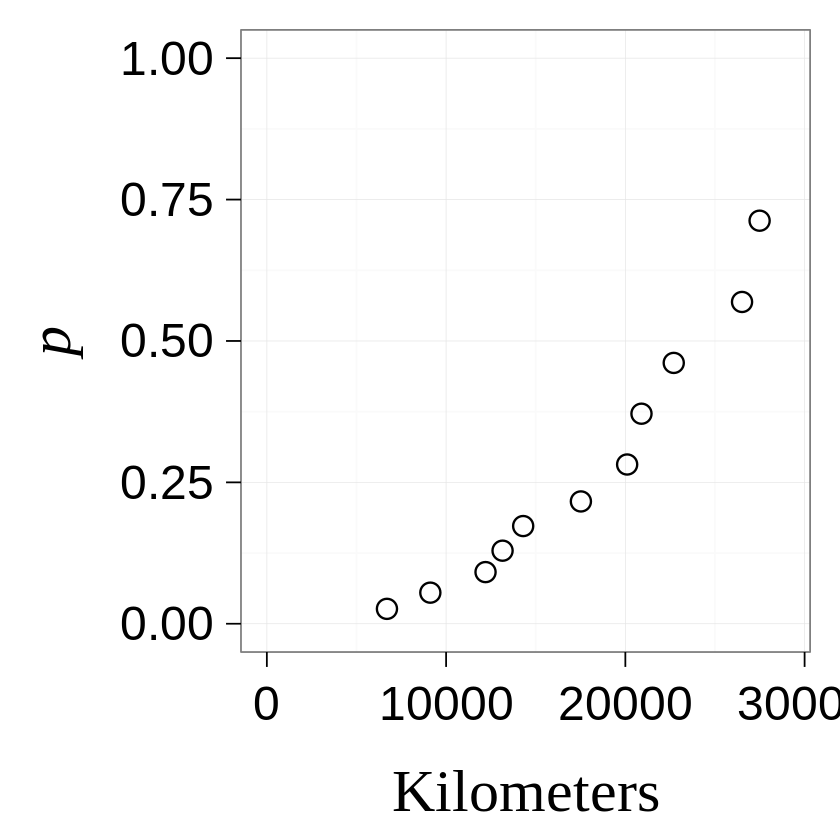

In [8]:
nj = rev(seq_along(distance))
d = data.frame(t=distance, nj)
d = d[which(mode%in%c("M1", "M2")), ]
d

d = d %>%
  mutate(p = (1)/nj) %>%
  mutate(q = 1-p) %>%
  mutate(SF = cumprod(q)) %>%
  mutate(CDF = 1-SF)
d

p = d %>%
  ggplot()+
  geom_pointj(aes(t, CDF), size=5)+
  xlim(c(0, max(d$t)*1.05))+ylim(c(0,1))+
  xlab("Kilometers")+ylab(quote(italic(p)))
p


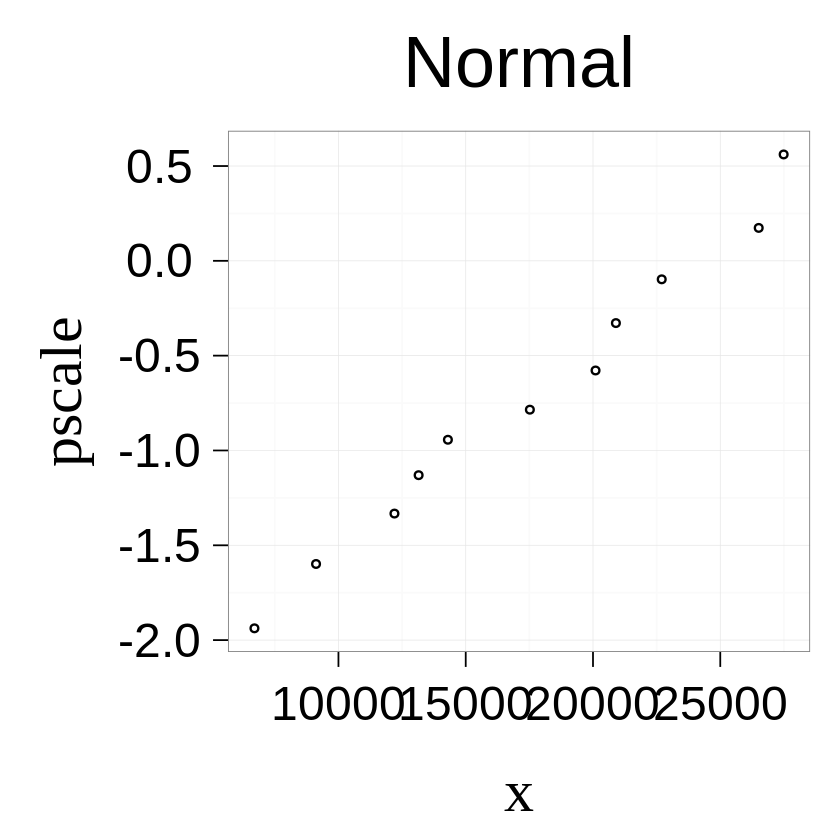

In [9]:
###' Normal Distribution
##############################
d$x = d$t
d$pscale = qnorm(d$CDF)
##############################
p.normal = d %>%
  ggplot(aes(x, pscale))+
  geom_pointj(show.legend = F) +
  ggtitle("Normal")
p.normal
# ggsave("shock_absorbers_pp_normal.pdf", width=sw, height=sh)



In [10]:
least.square = function(x, y){
  n = length(y)
  if(!is.matrix(x)){
    k= 1
  }else {
    k = ncol(x)
  }
  X = matrix(c(rep(1, n), x), ncol=k+1)
  Y = matrix(y)
  beta = solve(t(X) %*% X) %*% t(X) %*% Y
  sigma2 = t(Y-X %*% beta) %*% (Y-X %*% beta) / (n-k-1)
  return(c(beta, sigma2))
}


In [35]:
x = d$t
y = qnorm(d$CDF)
par.n = least.square(x, y)
par.n

[1] -2.6457442457  0.0001106815  0.0104533858

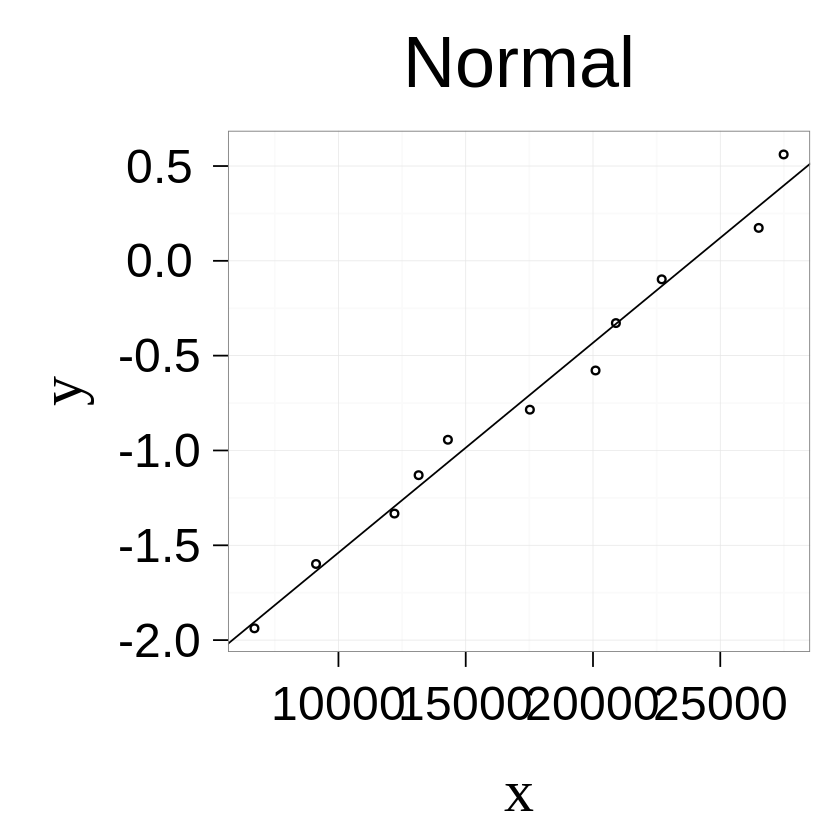

In [36]:
p.normal = data.frame(x, y) %>%
  ggplot(aes(x, y))+
  geom_pointj(show.legend = F) +
  ggtitle("Normal")+
    geom_abline(slope= par.n[2], intercept =par.n[1])
p.normal


In [18]:
1/par.n[2]
-par.n[1]/par.n[2]

[1] 9034.937

[1] 23904.13

In [39]:
x = log(d$t)
y = qnorm(d$CDF)
par.n = least.square(x, y)
par.n

[1] -16.7862052   1.6594182   0.0384424

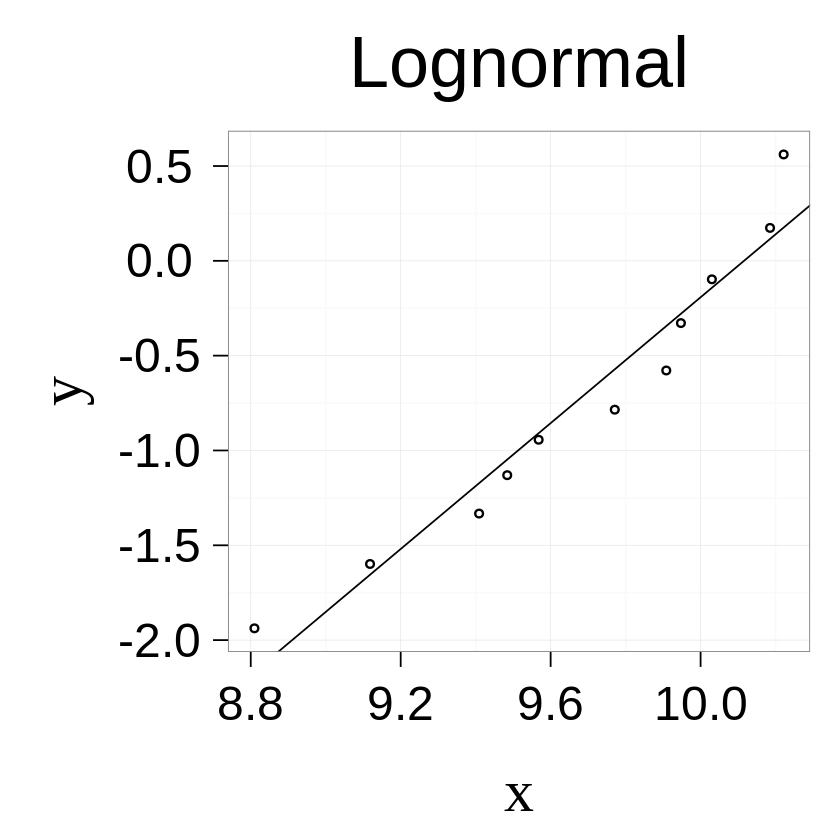

In [41]:
p.lognormal = data.frame(x, y) %>%
  ggplot(aes(x, y))+
  geom_pointj(show.legend = F) +
  ggtitle("Lognormal")+
    geom_abline(slope= par.n[2], intercept =par.n[1])
p.lognormal


In [48]:
sigma = 1/par.n[2]
mu = -par.n[1]/par.n[2]

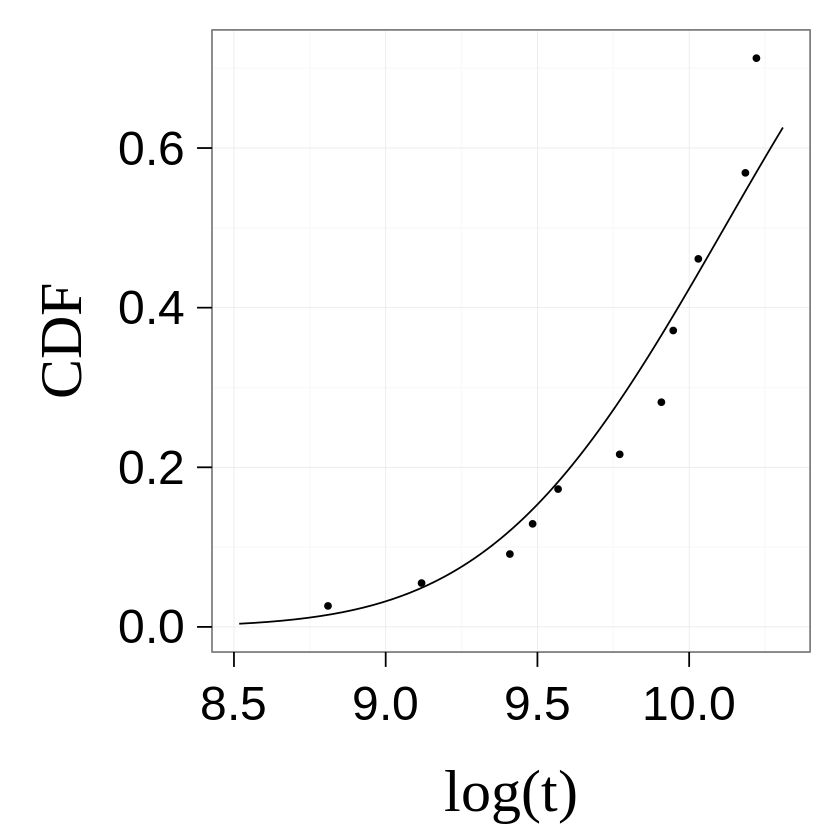

In [61]:
# d %>% ggplot(aes(log(t), CDF)) + geom_point()
x = seq(5000, 30000, len=100)
y = pnorm((log(x)-mu)/sigma)

d %>% ggplot(aes(log(t), CDF)) + geom_point() +
  geom_line(data = data.frame(x, y), aes(log(x), y))


In [87]:
x = log(d$t)
y = log(-log(1-d$CDF))
par.n = least.square(x, y)
par.n

[1] -26.70514780   2.60727249   0.02506843

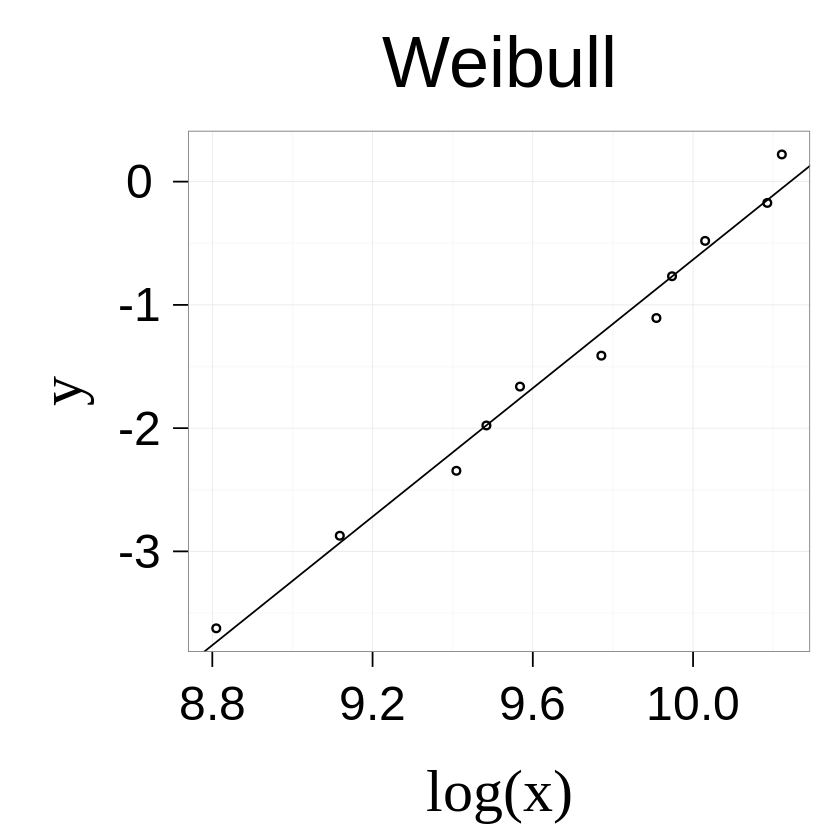

In [88]:
p.weibull = d %>%
  ggplot(aes(log(x), y))+
  geom_pointj(show.legend = F) +
  ggtitle("Weibull")+
    geom_abline(slope= par.n[2], intercept =par.n[1])
p.weibull


In [89]:
sigma = 1/par.n[2]
mu = -par.n[1]/par.n[2]
c(mu, sigma)

[1] 10.2425611  0.3835426

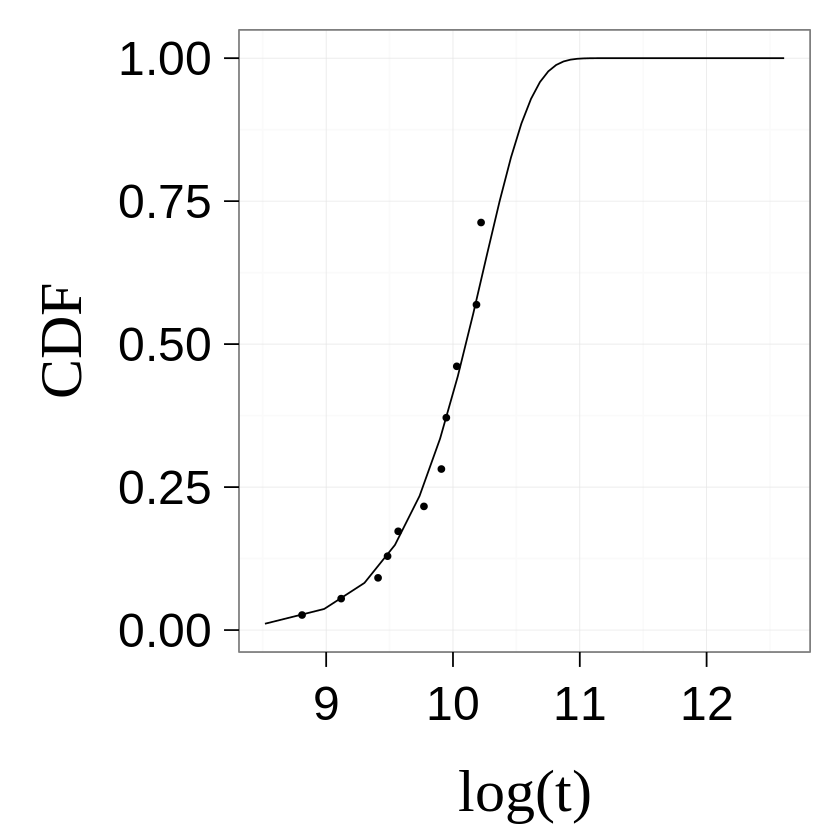

In [90]:
# d %>% ggplot(aes(log(t), CDF)) + geom_point()
x = seq(5000, 300000, len=100)

psev = function(z){
  1-exp(-exp(z))
}

y = psev((log(x)-mu)/sigma)

d %>% ggplot(aes(log(t), CDF)) + geom_point() +
  geom_line(data = data.frame(x, y), aes(log(x), y))
